In [1]:
from Data_Core.experiment import *
%matplotlib notebook

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import *

# Load Data and remove baseline + normalize

In [2]:
from shutil import copy

folder = r'D:/Data_LIBS/Mapa_Gelfa_SLIC_65x65/'
folders_spot = [folder+f+'/' for f in os.listdir(folder) if os.path.isdir(folder+f)]
current_experiment = experiment(folders_spot[0],ignore = '0000')
list_to_concatenate = []
for i in range(0,len(folders_spot)):
    print(i, ' of ', len(folders_spot),end='\r')
    new_experiment = experiment(folders_spot[i], ignore='0000')
    list_to_concatenate.append(new_experiment)
current_experiment.concatenate(list_to_concatenate)

In [3]:
for i in range(len(current_experiment.list_of_signals)):
    print('Removing baseline ' + str(i) + ' of ' +str(len(current_experiment.list_of_signals)),end='\r')
    current_experiment.list_of_signals[i].remove_baseline()
    current_experiment.list_of_signals[i].normalize()

# Sample Signal

<IPython.core.display.Javascript object>


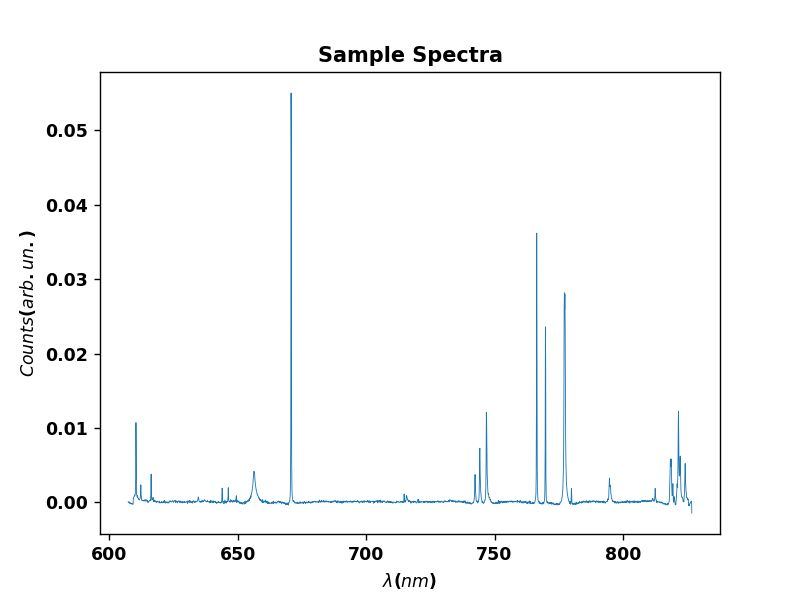

Text(0.5, 1.0, 'Sample Spectra')

In [16]:
ii=10
fig, ax = subplots()

ax.plot(current_experiment.list_of_signals[ii].wavelengths[0],
            current_experiment.list_of_signals[ii].spectrum[0],lw=0.5,alpha=1)
ax.set_xlabel(r'$\lambda(nm)$')
ax.set_ylabel(r'$Counts (arb.un.)$')
ax.set_title('Sample Spectra')

# Load mapa data
Disregard the map that appears at the end, most of the times is just a bad interpolation.
Basically this function computes the peak area, calculated at height h=ratio_of_maximum*maximum;

<IPython.core.display.Javascript object>


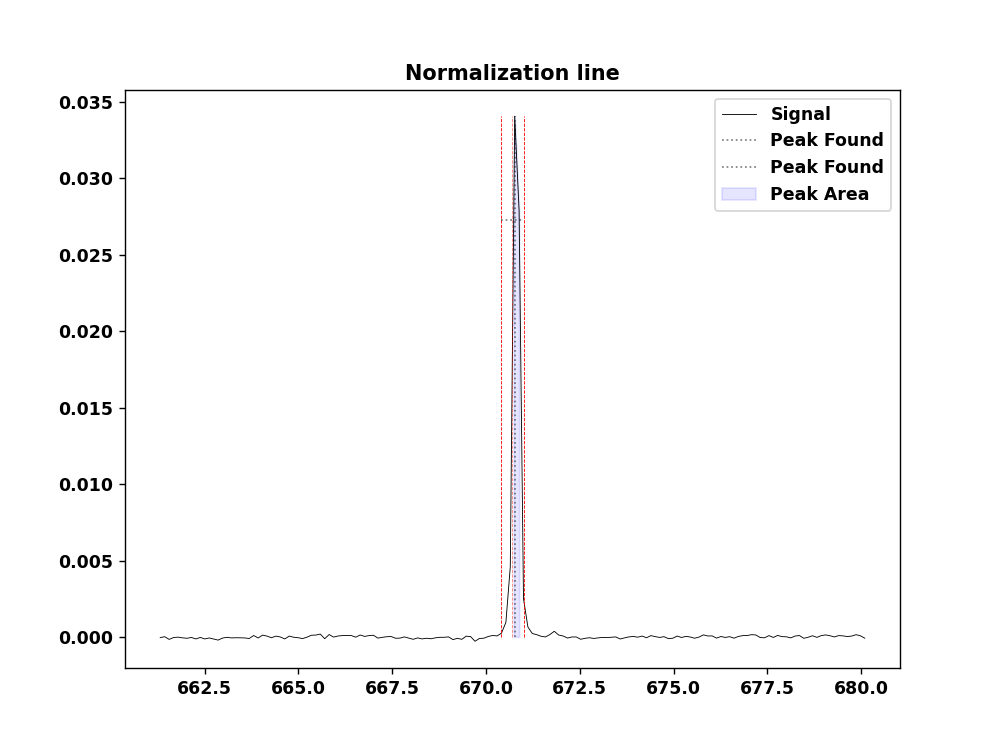

<IPython.core.display.Javascript object>


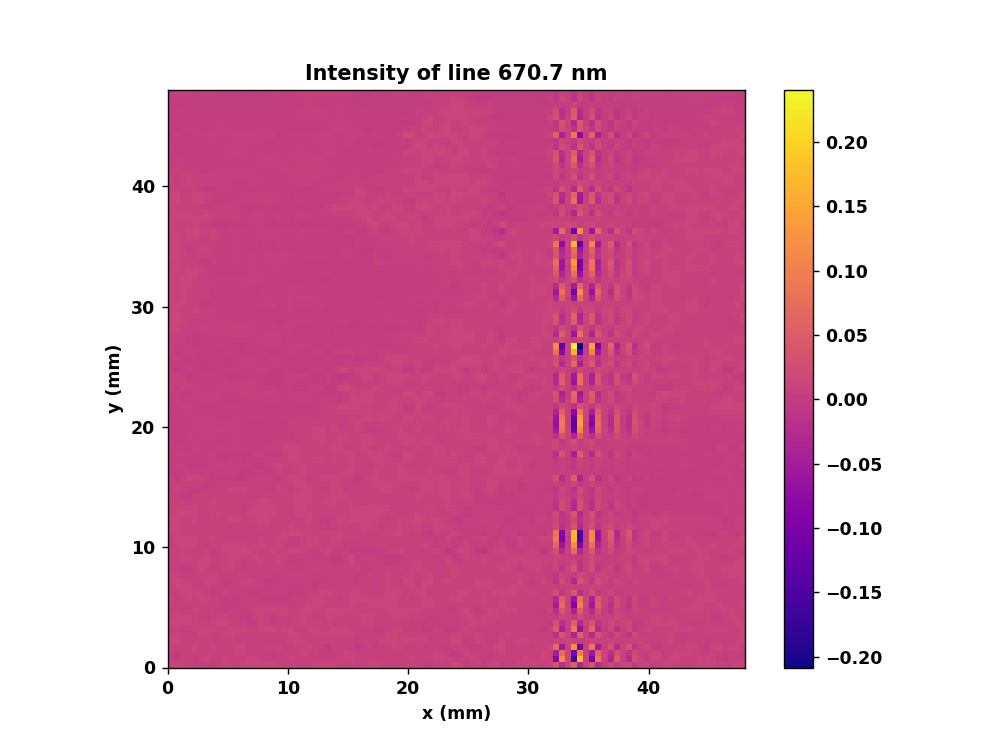

In [4]:
x_values,y_values,map_values1 = current_experiment.make_map(0,specific_wavelength = 670.7,ratio_of_maximum = 0.8, Plotline=True)

In [5]:
#correcting coordinates
x_values = np.array(x_values)
y_values = np.array(y_values)
x_values_old = np.copy(x_values)
x_values = y_values - np.min(y_values)# + 29.25
y_values = x_values_old

# for i in range(0,len(map_values1)):
#     if np.isnan(map_values1[i]):
#         print('WARNING: NAN found at ', i)

# Full resolution map

<IPython.core.display.Javascript object>


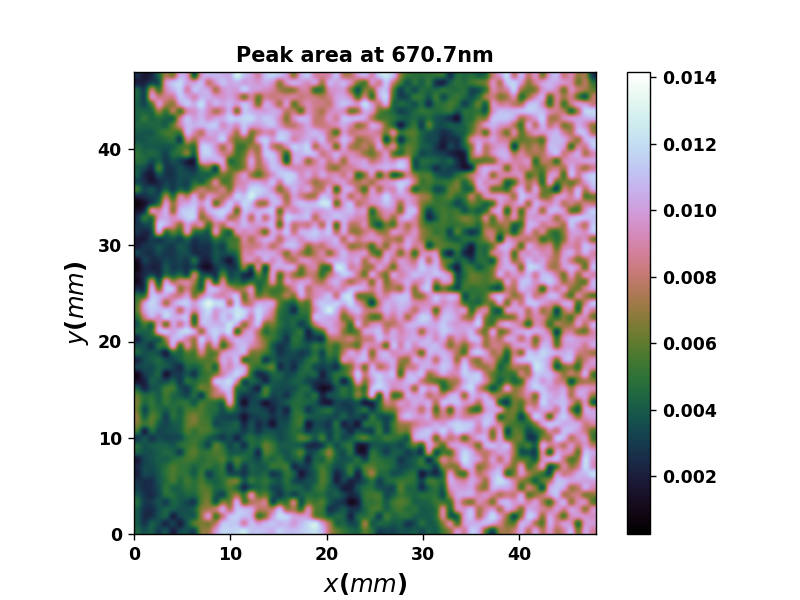

In [10]:
subplots()
title('Peak area at 670.7nm')
map_values_grid = np.array(map_values1)

map_values_grid = np.reshape(map_values_grid, (len(np.unique(x_values)),len(np.unique(y_values))))
imshow(map_values_grid, cmap = 'cubehelix', origin = 'lower', 
       extent=[0,max(x_values),0, max(y_values)],interpolation='gaussian')
ylabel('$y(mm)$',fontsize=14)
xlabel('$x(mm)$',fontsize=14)
colorbar()

<IPython.core.display.Javascript object>


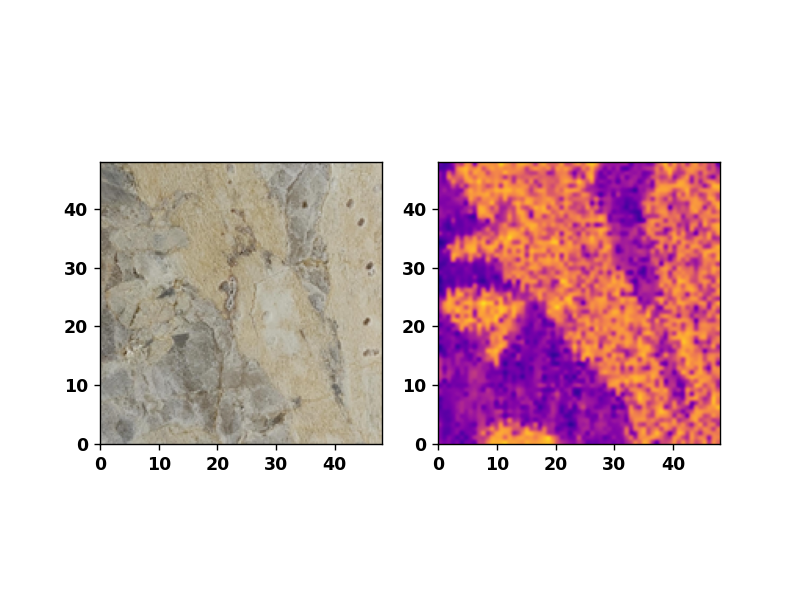

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io

from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from matplotlib.pyplot import *
from skimage.measure import regionprops


image = io.imread('gelfa_65.png')
img = img_as_float(image)
img = np.transpose(img,axes=(1,0,2))
img = img[::,::,:]

subplots()
title('Sample Image')
subplot(1,2,1)
imshow(img,origin = 'lower', 
       extent=[0,max(x_values),0, max(y_values)])
subplot(1,2,2)
imshow(map_values_grid, cmap = 'plasma', origin = 'lower', 
       extent=[0,max(x_values),0, max(y_values)],interpolation='gaussian')